# **Using Residual Sugar, Citric Acid and Volatile Acidity to judge a wine's quality.**
#### Leewana Nanda,
#### Arjun Bhatia (79462032)
#### Maya Tharp, 
#### Sue Dong (21518816)

## Introduction


Wine quality can be determined by a number of factors, ranging from physicochemical properties, such as residual
sugar, to sensory properties, like aroma, color and flavor. However, it is the interaction between the 
physicochemical properties and the sensory properties that allows for a judgment to be made regarding the quality
of the wine (Gutiérrez-Escobar et al., 2021). This project will investigate if physicochemical properties of sweet
red wine can predict the quality of the red wine. The dataset chosen is “Wine Quality” from UC Irvine and it is a 
multivariate dataset. The dataset has twelve variables in total, including the target “quality” variable and looks
at several physicochemical properties. 

Hypothesis: Higher levels of indicators of sweetness (volatile acidity, residual sugar, citric acid) correspond to higher quality and these 3 can be used to accurately predict the quality of a wine. 

[provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report,
clearly state the question you tried to answer with your project,
identify and describe the dataset that was used to answer the question]



## Methods

### Importing all the libraries been used in this project

In [1]:
install.packages("kknn")
install.packages("themis")
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
options(repr.plot.width = 10, repr.plot.height = 7)
library(themis)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘RANN’, ‘ROSE’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_

We loaded several R libraries needed throughout the whole project, setting up some options for displaying matrices and plotting.

###  Reading the data

After loading the tidyverse package, we have used the "read.csv2" function in R to load and read a CSV file directly from the specified URL and stored it in a data frame named "wine_data".

In [2]:
#Reading the data fom the URL 
wine_data <- read.csv2("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")

wine_data 

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5
6,0.31,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11,6


## Exploratory Analysis / Initial Data Analysis
Our raw data dimension is 1599 * 12, and a range of red wine features are collected from the dataset including measurements to the flavor (e.g. acidity and sugar), some key chemical elements contained in the wine (e.g. chlorides, sulfur dioxide) and also some general attributes (e.g. density, alcohol). The response variable in our project is quality, which is the variable of our interest, we want to classify.

###  Plotting the frequency of qualities in the dataset

We used ggplot to create a bar graph about the distribution of wine quality and we set the default width of the plot in the R environment to 7 inches and the height to 6 inches.It specified the dataframe "wine_data", used the column "quality of wine (3-8)" as the x-axis variable, and "frequency" as the y-axis variable to create a bar graph. We also did set.seed(1311) this sets the random number seed to 1131, to make sure that the random number used in generating the graph is reproducible.

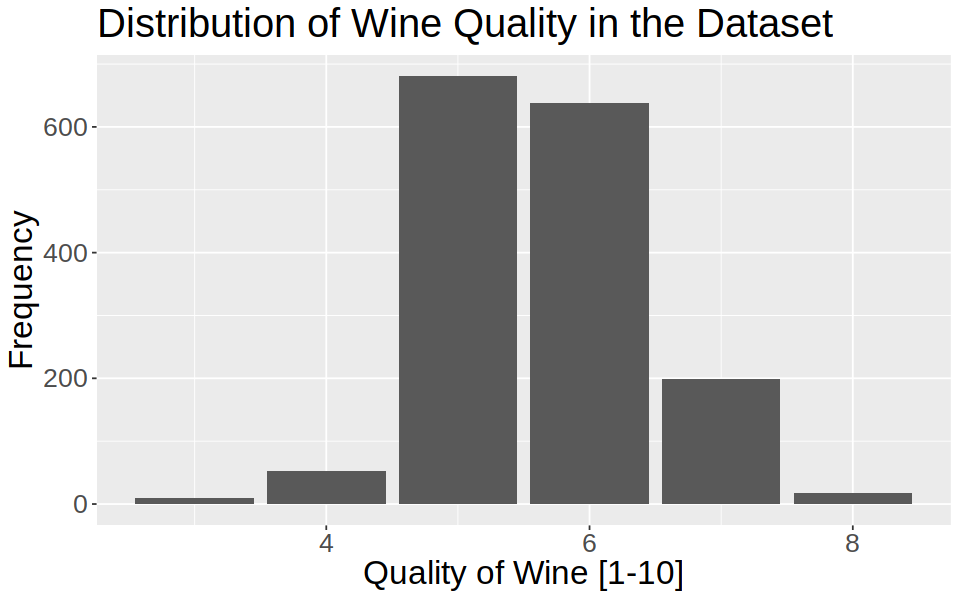

In [3]:
set.seed(1311)
options(repr.plot.width = 8, repr.plot.height = 5)

quality_distribution <- wine_data |>
                        ggplot(aes(x = quality)) +
                        geom_bar() +
                        labs(x = "Quality of Wine [1-10]", y = "Frequency") +
                        ggtitle("Distribution of Wine Quality in the Dataset") +
                        theme(text = element_text(size = 20))

quality_distribution

This graph visually depicts the distribution of wine quality in the dataset, as can be seen from the graph the quality of wine is rated from 1 to 10, with more data concentrated in 5 and 6, and the frequency is up to about 600.

###  Selecting the parameters we need and converting them from 'chr' to 'numeric' and 'factor'

In [4]:
set.seed(1311)
wine_data <- wine_data |> 
             select(volatile.acidity, citric.acid, residual.sugar, quality)|>
             mutate(volatile.acidity = as.numeric(volatile.acidity)) |>
             mutate(citric.acid = as.numeric(citric.acid)) |>
             mutate(residual.sugar = as.numeric(residual.sugar)) |>
             mutate(quality = as.factor(quality))

str(wine_data)

'data.frame':	1599 obs. of  4 variables:
 $ volatile.acidity: num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid     : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar  : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ quality         : Factor w/ 6 levels "3","4","5","6",..: 3 3 3 4 3 3 3 5 5 3 ...


We now perform column selection and variable type modification on the wine dataset, "set.seed" does the same thing as above. We use the select function to select specific columns from the dataset, including volatile.acidity, citric.acid, residual.sugar, and quality. In this way, the new "wine_data" dataframe will contain only these columns. The "wine_data" is then mutated using the mutate function, which specifically converts the data types of the volatile.acidity, citric.acid, and residual.sugar columns to numeric (as.numeric), and converts the data type of the quality column to factor (as.factor) to ensure that these variables have the appropriate data types for subsequent analysis and visualization. Finally, the structure of the "wine_data" dataframe is viewed by executing "str(wine_data)" to verify whether the structure of the dataframe and ensure that the data types are correct.

Our predictors are volatile.acid, which usually refers to the amount of volatile acids in a wine, citric.acid, which usually refers to the amount of citric acid in a wine, and residual.sugar, which usually refers to the amount of residual sugar in a wine. They are all chemical properties in wine and all affect the taste and quality of the wine. The reason we chose these three factors as predictors is that we feel they have the most impact on the response variable "quality", as can be seen in the box plot below.

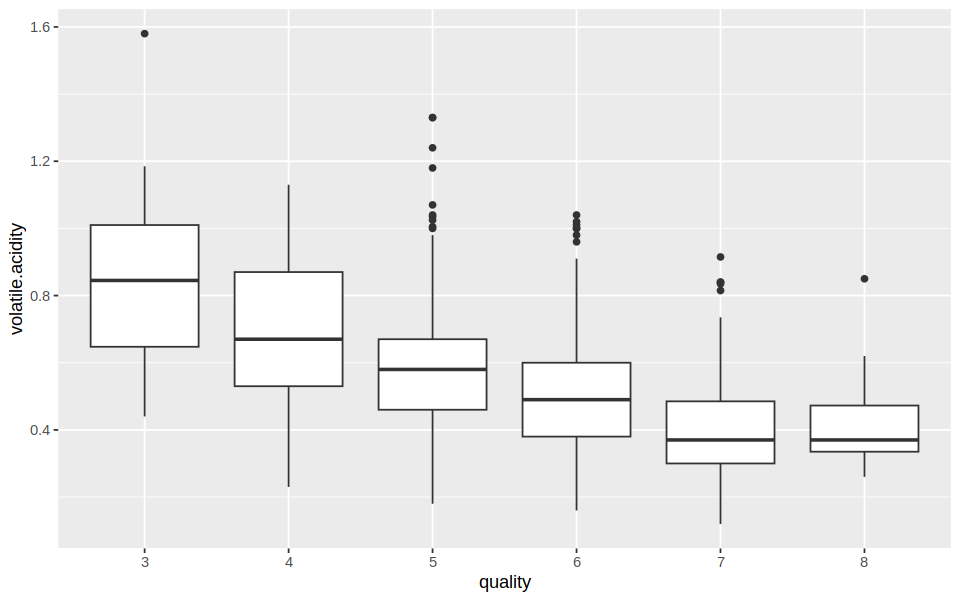

In [5]:
wine_data |>
        ggplot(aes(quality, volatile.acidity)) +
        geom_boxplot()

From the comparative boxplot above, we can clearly see that for wine with higher quality level the corresponding volatile.acidity tend to be lower.

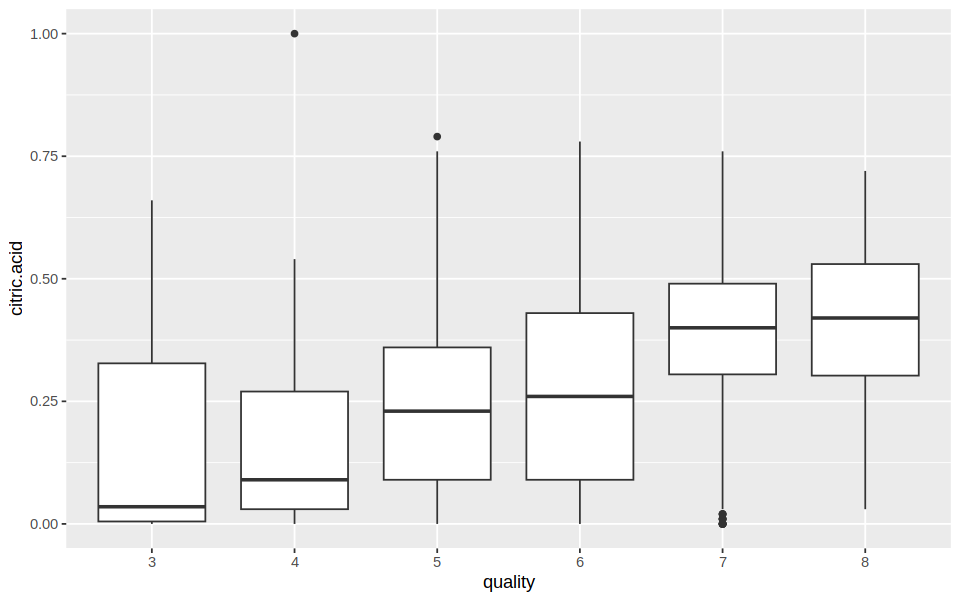

In [6]:
wine_data |>
        ggplot(aes(quality, citric.acid)) +
        geom_boxplot()

Similarly, from the boxplots for citric acid distribution across all levels, we can see the trend that the greater citric acid content, the better quality.

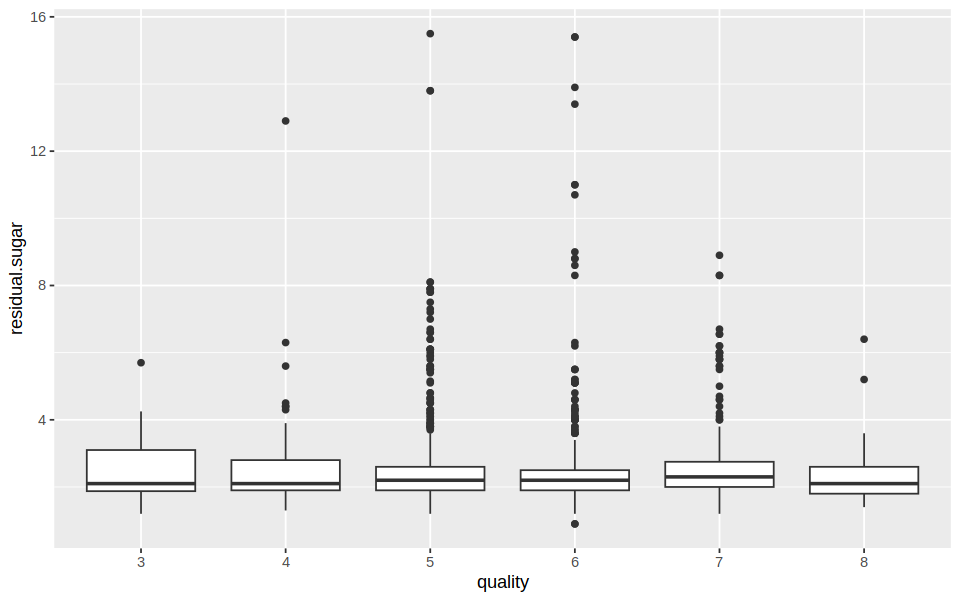

In [7]:
wine_data |>
        ggplot(aes(quality, residual.sugar)) +
        geom_boxplot()

From the graph above, although there seems to be no relationship between the sugar residuals and the wine quality, we still decided to select sugar.residuals as one of the predictors because it's commonly recognised by everyone that a good quality wine normally also taste good, and based on our research, a good sweetness is usually a bonus point to the judgement. Therefore, we definitely want to keep a variable to reflect sweetness in our model.

##  Modelling Analysis

### Scaling and centering wine data

In [8]:
set.seed(1311)
wine_recipe <- recipe(quality ~ ., data = wine_data)|>
               step_scale(all_predictors()) |>
               step_center(all_predictors())|>
               prep()
wine_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Training data contained 1599 data points and no missing data.

Operations:

Scaling for volatile.acidity, citric.acid, residual.sugar [trained]
Centering for volatile.acidity, citric.acid, residual.sugar [trained]

We used the functions in tidymodels to create a data processing recipe, set.seed does the same thing as above, and then we created a data processing recipe that is "quality ~" , which means that the goal of our model is to predict the value of the quality column, and all the other columns are predictor variables for the model. We then specify the data to be used in the training set. \
We then centered all the predictor variables with "step_center(all_predictors())" to ensure that the values of the individual predictor variables are centered at zero after processing. The purpose of using "step_scale(all_predictors())" to normalize all predictor variables to ensure that all predictor variables are on the same scale as standardisation step is critical to distance-involved model like the K-NN we about to implement. Finally, these steps are stored as "wine_recipe".

In [9]:
wine_scaled <- bake(wine_recipe, wine_data)
wine_scaled

volatile.acidity,citric.acid,residual.sugar,quality
<dbl>,<dbl>,<dbl>,<fct>
0.9615758,-1.391037,-0.45307667,5
1.9668271,-1.391037,0.04340257,5
1.2966596,-1.185699,-0.16937425,5
⋮,⋮,⋮,⋮
-0.09952274,-0.7236899,-0.1693742,6
0.65441573,-0.7750243,-0.3821511,5
-1.21646863,1.0216798,0.7526586,6


We'll be centering and normalizing "wine_data" here on the previously created "wine_recipe". We use the bake function to apply the previously created "wine_recipe" to "wine_data".The main focus is on centering and normalizing all the predictor variables, as this is the step defined when the recipe was created. Finally, the step is named wine_scaled and already contains the centered and normalized data.

### Classification based on 3 predictors:

In [10]:
#Splitting the data set into training and testing
set.seed(1311)

wine_split <- initial_split(wine_scaled, prop = 0.75, strata = quality)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)

We used knn from classification as our model, after that we set set.seed(1311), to make sure that we get the same result every time we run the same code. Then we used the "initial_split" function to split the dataset "wine_data" into a training set and a test set. The split will be 75% of the data that will be used for the training set and 25% of the data that will be used for the test set "strata = quality" indicates that the quality column is to be taken into account when splitting to make sure that both the training set and the test set contain wines of different quality levels. Extract the training set and test set from the split object and store them in "wine_training" and "wine_testing" respectively. Moreover, to ensure the knn model learn from the data and avoids overfitting and for more accurate model performance evaluation, make sure test data are new and unseen to the model so that we can evaluate the true performance of the model.

In [11]:
#Creating classification recipe and spec
set.seed(1311)

wine_recipe <- recipe(quality ~ . , data = wine_training)|>
               step_center(all_predictors())|>
               step_scale(all_predictors())|>
               prep()

wine_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
             set_engine("kknn") |>
             set_mode("classification")

wine_recipe
wine_tune

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Training data contained 1198 data points and no missing data.

Operations:

Centering for volatile.acidity, citric.acid, residual.sugar [trained]
Scaling for volatile.acidity, citric.acid, residual.sugar [trained]

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


We have newly added how to go about defining a tuning process where we use the k-nearest neighbor algorithm, also set.seed(1311) to make sure that we get the same result every time we run the same code. "nearest_neighbor(weight_func = "rectangular", neighbors = tune)" defines a tuning process for the k-nearest neighbor algorithm, where a rectangular window function is used ("rectangular") and the number of neighbors is determined by the tuning parameter ("rectangular"), and the number of neighbors is determined by the tuning parameter "set_engine("kknn")" to set the model engine to kknn (k-nearest neighbor), and "set_mode("classification")" to set the mode of the model to the classification task.

In [12]:
#Choosing the optimal number of neighbours 
set.seed(1311)
options(repr.plot.width = 8, repr.plot.height = 5)

wine_vfold <- vfold_cv(wine_training, v = 5, strata = quality)

knn_results <- workflow() |>
               add_recipe(wine_recipe) |>
               add_model(wine_tune) |>
               tune_grid(resamples = wine_vfold, grid = 10)|>
               collect_metrics()
knn_results

! Fold4: internal:
  There were 9 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 2`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): '3'
  Computation will proceed by ignoring those levels.
  ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 r...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.5158681,5,0.01404488,Preprocessor1_Model1
2,roc_auc,hand_till,0.5679978,5,0.00402413,Preprocessor1_Model1
3,accuracy,multiclass,0.4690445,5,0.02019476,Preprocessor1_Model2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
13,roc_auc,hand_till,0.6142288,5,0.02085922,Preprocessor1_Model8
14,accuracy,multiclass,0.4924964,5,0.01240292,Preprocessor1_Model9
14,roc_auc,hand_till,0.6171629,5,0.02075179,Preprocessor1_Model9


Next, we perform hyperparameter tuning of the k-nearest neighbor model and collect metrics for evaluating model performance. Firstly, we performed set.seed(1311) and set the default width and height of the graph. After that, a "wine_vfold' with 5-fold cross-validation was created using the "vfold_cv" function. Also, "strata = quality" was used to specify the stratification according to the target variable quality to ensure that each quality level is represented in each fold. After that, we use workflow to create an empty workflow object, "add_recipe(wine_recipe)" to add the data processing recipe to the workflow, and "add_model(wine_tune)" to add the k-nearest-neighbour model tuning process "tune_grid(resamples = wine_vfold, grid = 10)" is to perform a grid search of the model to tune the hyperparameters, using the cross-validation collapsed object created earlier "wine_vfold" and specifying the number of steps for the grid search (grid = 10). Finally, performance evaluation metrics for the tuned model were collected.

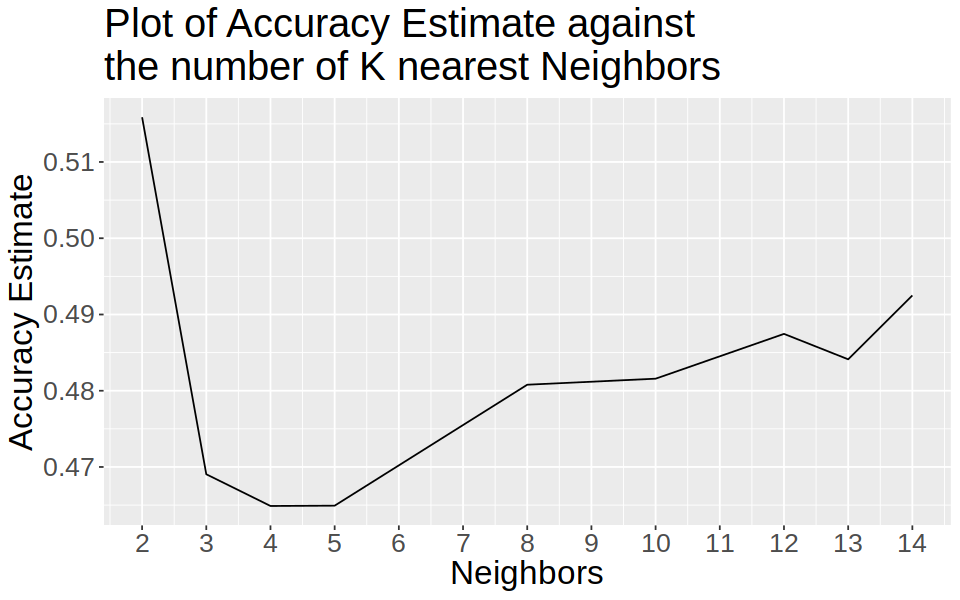

In [13]:
set.seed(1311)
#Plotting predicted accuracies to choose optimal number of neighbors

accuracies <- knn_results |> 
              filter(.metric == "accuracy")

accuracies_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
                   geom_line() +
                   labs(x = "Neighbors", y = "Accuracy Estimate", title = "Plot of Accuracy Estimate against
the number of K nearest Neighbors") +
                   scale_x_continuous(breaks = seq(0, 100, by = 1)) +  
                   theme(text = element_text(size = 20)) 

accuracies_plot

The purpose of repeating the above calculation steps is to help us select the best "k" for our k-NN model. As we can see from the figure, the best situation is Neighbors=2, despite it is a relatively low prediction accuracy of about 53%.

In [14]:
## Running the classification model on training data
set.seed(1311)

wine_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
             set_engine("kknn") |>
             set_mode("classification")

wine_fit <- workflow()|>
            add_recipe(wine_recipe)|>
            add_model(wine_spec)|>
            fit(data = wine_training)

wine_spec
wine_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 2
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(2,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.5292154
Best kernel: rectangular
Best k: 2

We want to create and train a k-nearest neighbor classification model and store the specification and fitting results of that model. We define a k-nearest-neighbor model using ("rectangular") and specifying neighbor is 2, followed by set_engine("kknn") and set_mode("classification"). Then use the previously defined specifications "wine_spec", "wine_recipe" and fit the model on the training set with the fit function.

In [15]:
#Checking against the testing data
set.seed(1311)
wine_predictions <- wine_fit|>
                    predict(wine_testing)|>
                    bind_cols(wine_testing)|>
                    metrics(truth = quality, estimate = .pred_class)|>
                    filter(.metric == "accuracy")
wine_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5311721


It can be seen that the accuracy we made the first time is too low, possibly because the hypotheses or models we chose may not fit our data patterns. Or it could be because our dataset is too small, the model may not generalize well to new and unseen data, and the lack of data may lead to overfitting. Or it could be because the distribution of categories in our dataset is unbalanced, with significantly fewer instances of one category than the others, and the model may be biased toward the majority of the categories and underperform on a few.

### Upsampling the dataset

In [16]:
# Non-Upsampled data
wine_scaled|>
  group_by(quality)|>
  summarize(n = n())

quality,n
<fct>,<int>
3,10
4,53
5,681
6,638
7,199
8,18


We felt that there should be a problem with our data, some of the categories were too small, such as 1 and 8, which limited the size of our k because if k was too large, it would cause our model to never predict a wine of type 1 or 8, so we upsampled the dataset.\
In order to go about solving the problem of low correctness, we chose to perform upsampling the dataset because by performing upsampling the dataset, the number of samples in a few categories can be increased, allowing for a more balanced representation of the individual categories in the training, and also improving the model's ability to generalize the model to avoid model bias. 

In [17]:
set.seed(1311)
#Upsampling scaled data to account for variance
ups_recipe <- recipe(quality ~ ., data = wine_scaled) |>
  step_upsample(quality, over_ratio = 1, skip = FALSE) |>
  prep()

upsampled_wine <- bake(ups_recipe, wine_scaled)

# Upsampled data
upsampled_wine |>
  group_by(quality) |>
  summarize(n = n())

quality,n
<fct>,<int>
3,681
4,681
5,681
6,681
7,681
8,681


It can be seen that here quality is categorized into 6 types (3-8), all with n 681, and the dataset now is pretty balanced with the new simulated data included.

### Classification using upsampled data

Next, we use the upsampled data to perform the previous steps of creating training data and testing data, followed by creating classification recipe and specification.

In [18]:
#Splitting the data set into training and testing
set.seed(1311)

wine_split <- initial_split(upsampled_wine, prop = 0.75, strata = quality)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)

In [19]:
#Creating classification recipe and spec
set.seed(1311)

wine_recipe <- recipe(quality ~ . , data = wine_training)|>
               step_center(all_predictors())|>
               step_scale(all_predictors())|>
               prep()

wine_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
             set_engine("kknn") |>
             set_mode("classification")

wine_recipe
wine_tune

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Training data contained 3060 data points and no missing data.

Operations:

Centering for volatile.acidity, citric.acid, residual.sugar [trained]
Scaling for volatile.acidity, citric.acid, residual.sugar [trained]

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [20]:
# V-fold and knn tune setup
set.seed(1311)

wine_vfold <- vfold_cv(wine_training, v = 5, strata = quality)

In [21]:
# Choosing the optimal number of neighbors for classification
set.seed(1311)

knn_results <- workflow() |>
               add_recipe(wine_recipe) |>
               add_model(wine_tune) |>
               tune_grid(resamples = wine_vfold, grid = 10)|>
               collect_metrics()
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.8686275,5,0.003372511,Preprocessor1_Model1
2,roc_auc,hand_till,0.9289687,5,0.002427634,Preprocessor1_Model1
4,accuracy,multiclass,0.8006536,5,0.008331731,Preprocessor1_Model2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
13,roc_auc,hand_till,0.9212220,5,0.001414133,Preprocessor1_Model8
15,accuracy,multiclass,0.6856209,5,0.006709302,Preprocessor1_Model9
15,roc_auc,hand_till,0.9191366,5,0.001744042,Preprocessor1_Model9


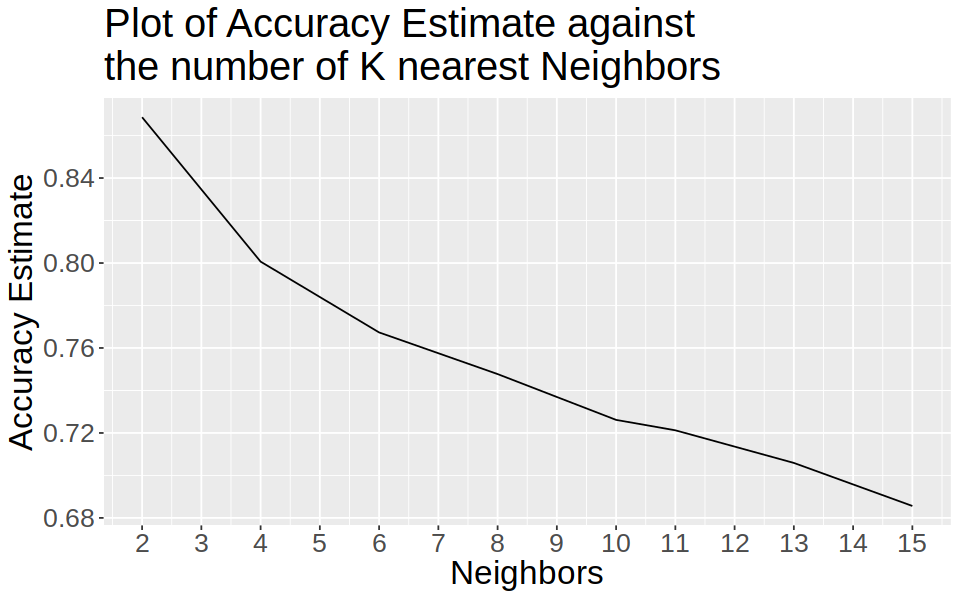

In [22]:
set.seed(1311)
#Plotting predicted accuracies to choose optimal number of neighbors

accuracies <- knn_results |> 
              filter(.metric == "accuracy")

accuracies_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
                   geom_line() +
                   labs(x = "Neighbors", y = "Accuracy Estimate", title = "Plot of Accuracy Estimate against
the number of K nearest Neighbors") +
                   scale_x_continuous(breaks = seq(0, 100, by = 1)) +  
                   theme(text = element_text(size = 20)) 

accuracies_plot

We would like to graph the accuracy of the k-nearest neighbor model for different number of neighbors in order to choose the optimal number of neighbors. We start by filtering the accuracy-related data from the previously collected "knn_results". Then used ggplot to create an "accuracies_plot", where the x-axis denotes neighbors, the y-axis denotes mean, and used "geom_line()" to add a line connecting the mean values of the accuracy under each number of neighbors. \
From the graph, we can see that the accuracy decreases as the neighbors get larger and larger. Therefore, it can be seen that the best accuracy is achieved at neighbors = 2.

In [23]:
set.seed(1234)

wine_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
             set_engine("kknn") |>
             set_mode("classification")

wine_fit <- workflow()|>
            add_recipe(wine_recipe)|>
            add_model(wine_spec)|>
            fit(data = wine_training)
wine_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(2,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1611111
Best kernel: rectangular
Best k: 2

## Testing on testing data

In [24]:
wine_predictions <- wine_fit|>
                    predict(wine_testing)|>
                    bind_cols(wine_testing)|>
                    metrics(truth = quality, estimate = .pred_class)|>
                    filter(.metric == "accuracy")
wine_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8947368


We repeated the exact same steps as the previous k-nn training process using the new data after the upsample and performed model prediction on the test set to evaluate the model performance. With the increase in accuracy, we can see that the performance is now significantly improved.

Findings : accuracy is too low so these 3 alone cant classify wine reliably, the probelm is also the data since it is very unbalanced, almost no observations for 3 and almnost the name sumber of observations for 5 and 6. Maybe this question can still hold true but we would need more balanced data or to pursue oversampling of the less prevelant qualities. Infact the findings of the model are opposite as shown in the 3 scatter plots above. We are getting such biased reaults because 

a) levels of these indicators are pretty much the same

b) there isn't much observational variety

c) one solution is to group qualities together into an interval like [3,5), (5,7), [7, 9]

THESE ARE FOR OLD ONE WITH LOW ACCURACY